In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.utils import to_categorical
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

import seaborn as sns

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.utils import to_categorical

# Load dataset
data = pd.read_csv('/content/Car_Hacking.csv')




In [ ]:
data


,CAN ID,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Label
0,1201,41,39,39,35,0,0,0,154,R
1,809,64,187,127,20,17,32,0,20,R
2,1349,216,0,0,136,0,0,0,0,R
3,1201,41,39,39,35,0,0,0,154,R
4,2,0,0,0,0,0,3,2,228,R
...,...,...,...,...,...,...,...,...,...,...
818435,848,5,32,52,104,117,0,0,12,R
818436,1088,255,0,0,0,255,134,9,0,R
818437,848,5,32,100,104,117,0,0,92,R
818438,1349,216,90,0,137,0,0,0,0,R


In [ ]:
data.columns

Index(['CAN ID', 'DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]',
       'DATA[5]', 'DATA[6]', 'DATA[7]', 'Label'],
      dtype='object')

In [ ]:
data['Label'].unique()

array(['R', 'DoS', 'Fuzzy', 'RPM', 'gear'], dtype=object)

In [ ]:
data.describe()

,CAN ID,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7]
count,818440.000000,818440.000000,818440.000000,818440.000000,818440.000000,818440.000000,818440.000000,818440.000000,818440.000000
mean,697.482182,58.136694,45.817090,40.415897,78.690225,51.373894,61.808144,26.254518,54.088396
std,392.604455,89.756745,54.417243,58.516628,102.396787,73.123565,77.302549,57.335418,80.139865
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,339.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,704.000000,8.000000,32.000000,0.000000,20.000000,16.000000,32.000000,0.000000,0.000000
75%,1072.000000,69.000000,69.000000,96.000000,137.000000,107.000000,127.000000,10.000000,109.000000
max,2047.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [ ]:
data['Category'] = (data['Label'] != 'R').astype(int)

# Verify the results
print("\nSample of the updated dataframe:")
print(data[['Label', 'Category']].head())

print("\nCategory distribution:")
print(data['Category'].value_counts())



Sample of the updated dataframe:
  Label  Category
0     R         0
1     R         0
2     R         0
3     R         0
4     R         0

Category distribution:
Category
0    701832
1    116608
Name: count, dtype: int64


In [ ]:
data=data.drop('Label', axis=1)

In [ ]:
data

,CAN ID,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Category
0,1201,41,39,39,35,0,0,0,154,0
1,809,64,187,127,20,17,32,0,20,0
2,1349,216,0,0,136,0,0,0,0,0
3,1201,41,39,39,35,0,0,0,154,0
4,2,0,0,0,0,0,3,2,228,0
...,...,...,...,...,...,...,...,...,...,...
818435,848,5,32,52,104,117,0,0,12,0
818436,1088,255,0,0,0,255,134,9,0,0
818437,848,5,32,100,104,117,0,0,92,0
818438,1349,216,90,0,137,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import KMeansSMOTE
import pandas as pd

# Splitting the dataset into a 70-30 train-test split
def simple_split(data):
    train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)
    return train_data, test_data

# Assuming 'data' is a Pandas DataFrame
# Apply the splitting function
train_data, test_data = simple_split(data)



X_train = train_data.drop(columns=['Category'], errors='ignore')
y_train = train_data['Category']

# Apply K-Means SMOTE to handle class imbalance
kmeans_smote = KMeansSMOTE(random_state=42,k_neighbors=2, cluster_balance_threshold=0.2)
X_resampled, y_resampled = kmeans_smote.fit_resample(X_train, y_train)

# Recombine X_resampled and y_resampled into a single DataFrame
train_data = pd.concat([pd.DataFrame(X_resampled, columns=X_train.columns), pd.DataFrame(y_resampled, columns=['Category'])], axis=1)


# Count of samples per class before KMeans SMOTE
print("Count of samples per class BEFORE KMeans SMOTE:")
print(y_train.value_counts())

# Count of samples per class after KMeans SMOTE
print("\nCount of samples per class AFTER KMeans SMOTE:")
print(train_data['Category'].value_counts())


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The KMeansSMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Count of samples per class BEFORE KMeans SMOTE:
Category
0    491567
1     81341
Name: count, dtype: int64

Count of samples per class AFTER KMeans SMOTE:
Category
1    491569
0    491567
Name: count, dtype: int64


Echo State Network

In [ ]:

# Manual Echo State Network Implementation
class ManualESN:
    def __init__(self, input_dim, reservoir_size, spectral_radius=0.95, sparsity=0.1):
        self.input_dim = input_dim
        self.reservoir_size = reservoir_size
        self.spectral_radius = spectral_radius
        self.sparsity = sparsity
        self.W_in = np.random.uniform(-1, 1, (reservoir_size, input_dim))
        self.W = np.random.uniform(-1, 1, (reservoir_size, reservoir_size))
        self.W[np.random.rand(*self.W.shape) > sparsity] = 0
        max_eig = max(abs(np.linalg.eigvals(self.W)))
        self.W *= spectral_radius / max_eig
        self.state = np.zeros(reservoir_size)

    def update(self, input_data):
        # Convert input_data to a NumPy array with float64 dtype
        input_data = np.array(input_data, dtype=np.float64)
        self.state = np.tanh(np.dot(self.W_in, input_data) + np.dot(self.W, self.state))
        return self.state

    def fit_transform(self, X):
        states = []
        for x in X:
            states.append(self.update(x))
        return np.array(states)


# DNN Training
class ESN_DNN:
    def __init__(self, reservoir_size=200, spectral_radius=0.95):
        self.esn = ManualESN(input_dim=train_data.drop('Category', axis=1).shape[1],
                             reservoir_size=reservoir_size, spectral_radius=spectral_radius)
        self.dnn = None

    def train(self, X, y):
        esn_output = self.esn.fit_transform(X)
        self.dnn = Sequential([
            Dense(64, activation='relu', input_shape=(esn_output.shape[1],)),
            Dropout(0.15),
            Dense(64, activation='relu'),
            Dropout(0.15),
            Dense(128, activation='relu'),
            Dropout(0.25),
            Dense(32, activation='relu'),
            Dense(len(np.unique(y)), activation='softmax')
        ])
        self.dnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        self.dnn.fit(esn_output, y, epochs=15, batch_size=64, verbose=1)

    def predict(self, X):
        esn_output = self.esn.fit_transform(X)
        return self.dnn.predict(esn_output)

# Train and evaluate the model
esn_dnn_model = ESN_DNN(reservoir_size=250, spectral_radius=0.95)
esn_dnn_model.train(train_data.drop('Category', axis=1).values, train_data['Category'].values)




/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
15362/15362 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9834 - loss: 0.0530
Epoch 2/15
15362/15362 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.9942 - loss: 0.0239
Epoch 3/15
15362/15362 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - accuracy: 0.9954 - loss: 0.0199
Epoch 4/15
15362/15362 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.9959 - loss: 0.0185
Epoch 5/15
15362/15362 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - accuracy: 0.9965 - loss: 0.0162
Epoch 6/15
15362/15362 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.9964 - loss: 0.0167
Epoch 7/15
15362/15362 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9966 - loss: 0.0162
Epoch 8/15
15362/15362 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.9969 - loss: 0.0149
Epoch 9/15
15362/15362 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.9968 - loss: 0.0153
Epoch 10/15
15362/15362 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9968 - loss: 0.0156
Epoch 11/15
15362/15362 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9969 - loss: 0.01

7673/7673 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    210265
           1       0.99      1.00      0.99     35267

    accuracy                           1.00    245532
   macro avg       0.99      1.00      1.00    245532
weighted avg       1.00      1.00      1.00    245532



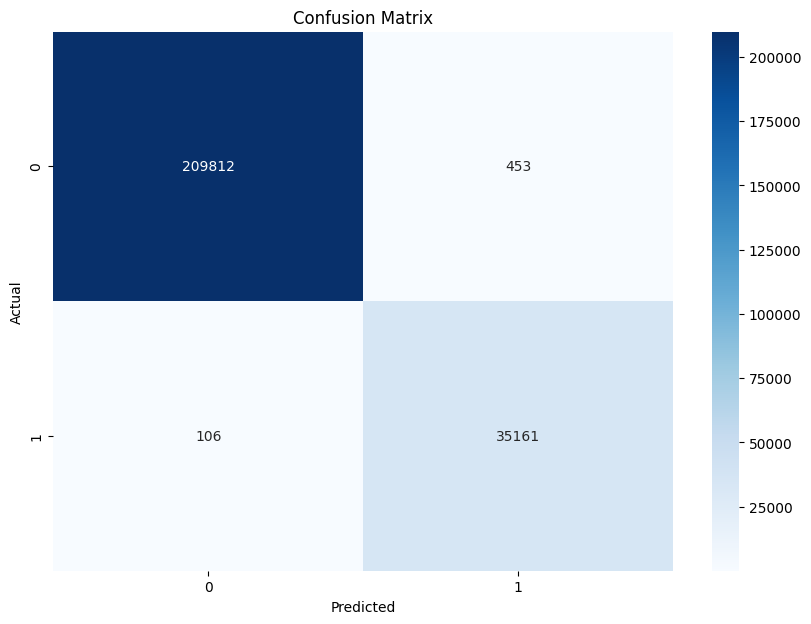

In [ ]:
# Prediction
y_pred = esn_dnn_model.predict(test_data.drop('Category', axis=1).values)
y_pred = np.argmax(y_pred, axis=1)

# Evaluation
print("Classification Report:\n")
print(classification_report(test_data['Category'].values, y_pred))

# Plot classification report
conf_matrix = confusion_matrix(test_data['Category'].values, y_pred)
plt.figure(figsize=(10, 7))
plt.title("Confusion Matrix")
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(test_data['Category']),
            yticklabels=np.unique(test_data['Category']))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

7673/7673 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step
30723/30723 ━━━━━━━━━━━━━━━━━━━━ 54s 2ms/step
Test Data Metrics:
Accuracy: 0.9977
Precision: 0.9934
Recall: 0.9974
F1 Score: 0.9954
AUC-ROC: 0.9996

Train Data Metrics:
Accuracy: 0.9979
Precision: 0.9979
Recall: 0.9979
F1 Score: 0.9979
AUC-ROC: 0.9992

Classification Report for Test Data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    210265
           1       0.99      1.00      0.99     35267

    accuracy                           1.00    245532
   macro avg       0.99      1.00      1.00    245532
weighted avg       1.00      1.00      1.00    245532



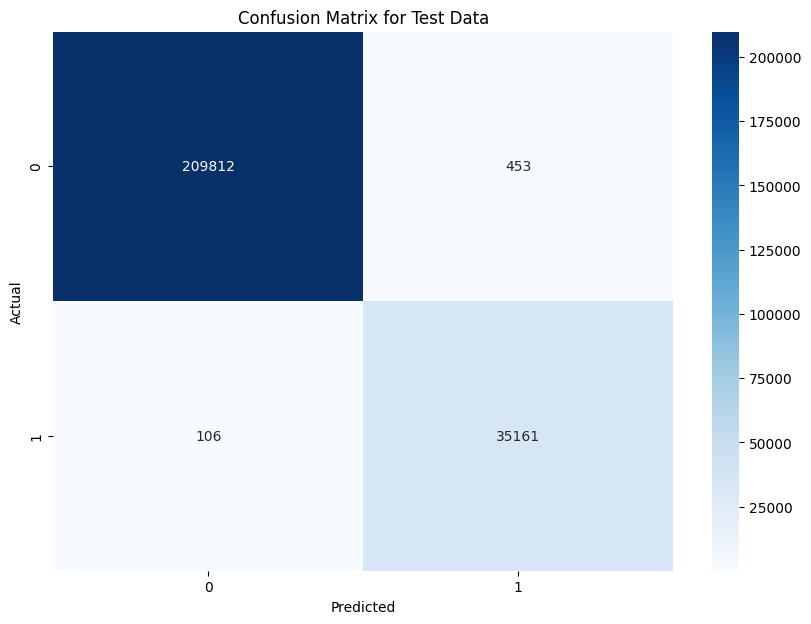

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Prediction for Test Data
y_test_true = test_data['Category'].values
y_test_pred_prob = esn_dnn_model.predict(test_data.drop('Category', axis=1).values)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)

# Prediction for Train Data
y_train_true = train_data['Category'].values
y_train_pred_prob = esn_dnn_model.predict(train_data.drop('Category', axis=1).values)
y_train_pred = np.argmax(y_train_pred_prob, axis=1)

def evaluate_metrics(y_true, y_pred, y_pred_prob, average='macro'):
    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average=average, zero_division=0),
        "Recall": recall_score(y_true, y_pred, average=average),
        "F1 Score": f1_score(y_true, y_pred, average=average),
        # Select the probability for the positive class (class 1)
        "AUC-ROC": roc_auc_score(y_true, y_pred_prob[:, 1], multi_class='ovr')
    }
    return metrics


# Evaluate for Test Data
test_metrics = evaluate_metrics(y_test_true, y_test_pred, y_test_pred_prob)
print("Test Data Metrics:")
for key, value in test_metrics.items():
    print(f"{key}: {value:.4f}")

# Evaluate for Train Data
train_metrics = evaluate_metrics(y_train_true, y_train_pred, y_train_pred_prob)
print("\nTrain Data Metrics:")
for key, value in train_metrics.items():
    print(f"{key}: {value:.4f}")

# Classification Report
print("\nClassification Report for Test Data:\n")
print(classification_report(y_test_true, y_test_pred))

# Confusion Matrix for Test Data
conf_matrix = confusion_matrix(y_test_true, y_test_pred)
plt.figure(figsize=(10, 7))
plt.title("Confusion Matrix for Test Data")
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(test_data['Category']),
            yticklabels=np.unique(test_data['Category']))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()




Long Short Term Memory

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import LabelEncoder

class StackedLSTM:
    def __init__(self, input_shape, lstm_units=128, n_lstm_layers=2, dropout_rate=0.2):
        self.model = Sequential()
        for i in range(n_lstm_layers):
            if i == 0:
                # First LSTM layer with input shape
                self.model.add(LSTM(lstm_units, return_sequences=True, input_shape=input_shape))
            elif i == n_lstm_layers - 1:
                # Last LSTM layer without return_sequences
                self.model.add(LSTM(lstm_units, return_sequences=False))
            else:
                # Intermediate LSTM layers
                self.model.add(LSTM(lstm_units, return_sequences=True))
            self.model.add(Dropout(dropout_rate))

    def fit_transform(self, X):
        return self.model.predict(X)


class LSTM_DNN:
    def __init__(self, lstm_units=128, n_lstm_layers=2, dropout_rate=0.2):
        self.lstm = StackedLSTM(input_shape=(None, train_data.drop('Category', axis=1).shape[1]),
                                lstm_units=lstm_units,
                                n_lstm_layers=n_lstm_layers,
                                dropout_rate=dropout_rate)
        self.dnn = None

    def train(self, X, y):
        # Reshape input data for LSTM: (samples, timesteps, features)
        X_reshaped = X.reshape((X.shape[0], 1, X.shape[1]))
        lstm_output = self.lstm.fit_transform(X_reshaped)

        # Encode labels for categorical crossentropy
        y_encoded = LabelEncoder().fit_transform(y)

        # Build DNN for classification
        self.dnn = Sequential([
            Dense(64, activation='relu', input_shape=(lstm_output.shape[1],)),
            Dropout(0.2),
            Dense(32, activation='relu'),
            Dense(len(np.unique(y)), activation='softmax')
        ])
        self.dnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        self.dnn.fit(lstm_output, y_encoded, epochs=10, batch_size=64, verbose=1)

    def predict(self, X):
        X_reshaped = X.reshape((X.shape[0], 1, X.shape[1]))
        lstm_output = self.lstm.fit_transform(X_reshaped)
        return self.dnn.predict(lstm_output)


# Train and evaluate the model
lstm_dnn_model = LSTM_DNN(lstm_units=128, n_lstm_layers=3, dropout_rate=0.2)
lstm_dnn_model.train(train_data.drop('Category', axis=1).values, train_data['Category'].values)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30723/30723 ━━━━━━━━━━━━━━━━━━━━ 123s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
15362/15362 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - accuracy: 0.9683 - loss: 0.0934
Epoch 2/10
15362/15362 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - accuracy: 0.9965 - loss: 0.0120
Epoch 3/10
15362/15362 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.9974 - loss: 0.0087
Epoch 4/10
15362/15362 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9979 - loss: 0.0073
Epoch 5/10
15362/15362 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - accuracy: 0.9982 - loss: 0.0065
Epoch 6/10
15362/15362 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - accuracy: 0.9983 - loss: 0.0059
Epoch 7/10
15362/15362 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.9984 - loss: 0.0055
Epoch 8/10
15362/15362 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.9986 - loss: 0.0050
Epoch 9/10
15362/15362 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - accuracy: 0.9986 - loss: 0.0049
Epoch 10/10
15362/15362 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.9988 - loss: 0.0044


7673/7673 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step
7673/7673 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step
30723/30723 ━━━━━━━━━━━━━━━━━━━━ 120s 4ms/step
30723/30723 ━━━━━━━━━━━━━━━━━━━━ 43s 1ms/step
Test Data Metrics:
Accuracy: 0.9994
Precision: 0.9983
Recall: 0.9991
F1 Score: 0.9987
AUC-ROC: 0.9999

Train Data Metrics:
Accuracy: 0.9995
Precision: 0.9995
Recall: 0.9995
F1 Score: 0.9995
AUC-ROC: 1.0000

Classification Report for Test Data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    210265
           1       1.00      1.00      1.00     35267

    accuracy                           1.00    245532
   macro avg       1.00      1.00      1.00    245532
weighted avg       1.00      1.00      1.00    245532



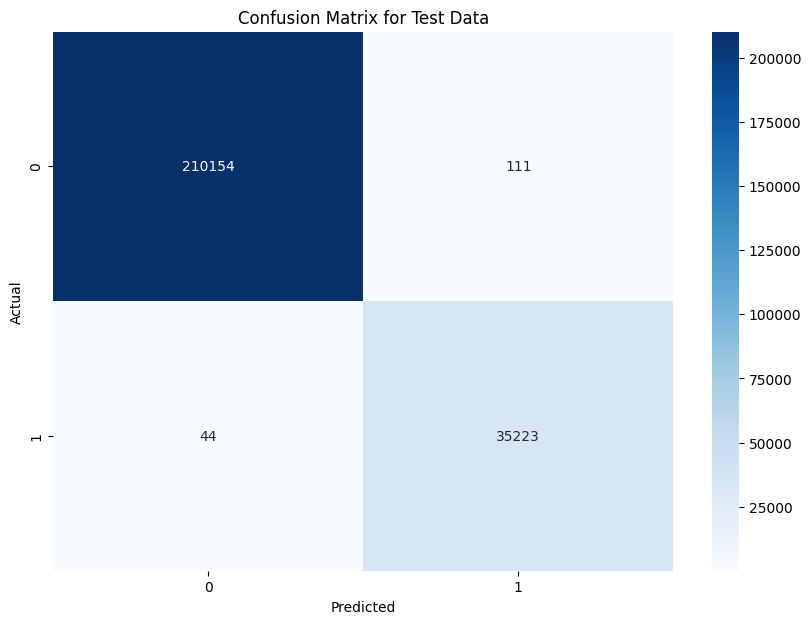

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Prediction for Test Data
y_test_true = test_data['Category'].values
y_test_pred_prob = lstm_dnn_model.predict(test_data.drop('Category', axis=1).values)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)

# Prediction for Train Data
y_train_true = train_data['Category'].values
y_train_pred_prob = lstm_dnn_model.predict(train_data.drop('Category', axis=1).values)
y_train_pred = np.argmax(y_train_pred_prob, axis=1)

def evaluate_metrics(y_true, y_pred, y_pred_prob, average='macro'):
    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average=average, zero_division=0),
        "Recall": recall_score(y_true, y_pred, average=average),
        "F1 Score": f1_score(y_true, y_pred, average=average),
        # Select the probability for the positive class (class 1)
        "AUC-ROC": roc_auc_score(y_true, y_pred_prob[:, 1], multi_class='ovr')
    }
    return metrics


# Evaluate for Test Data
test_metrics = evaluate_metrics(y_test_true, y_test_pred, y_test_pred_prob)
print("Test Data Metrics:")
for key, value in test_metrics.items():
    print(f"{key}: {value:.4f}")

# Evaluate for Train Data
train_metrics = evaluate_metrics(y_train_true, y_train_pred, y_train_pred_prob)
print("\nTrain Data Metrics:")
for key, value in train_metrics.items():
    print(f"{key}: {value:.4f}")

# Classification Report
print("\nClassification Report for Test Data:\n")
print(classification_report(y_test_true, y_test_pred))

# Confusion Matrix for Test Data
conf_matrix = confusion_matrix(y_test_true, y_test_pred)
plt.figure(figsize=(10, 7))
plt.title("Confusion Matrix for Test Data")
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(test_data['Category']),
            yticklabels=np.unique(test_data['Category']))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


